In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [19]:
df=pd.read_csv("cats_vs_dogs.csv")
df.head()

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191


In [21]:
print(df.columns)

Index(['Unnamed: 0', 'state', 'n_households', 'percent_pet_households',
       'n_pet_households', 'percent_dog_owners', 'n_dog_households',
       'avg_dogs_per_household', 'dog_population', 'percent_cat_owners',
       'n_cat_households', 'avg_cats_per_household', 'cat_population'],
      dtype='object')


In [23]:
df['target'] = (df['dog_population'] > df['cat_population']).astype(int)
df

,Unnamed: 0,state,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,target
0,1,Alabama,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252,1
1,2,Arizona,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438,1
2,3,Arkansas,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810,1
3,4,California,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118,0
4,5,Colorado,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191,1
5,6,Connecticut,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,0
6,7,Delaware,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187,0
7,8,District of Columbia,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63,0
8,9,Florida,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375,0
9,10,Georgia,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162,1


In [25]:
df = df.drop(columns=['Unnamed: 0', 'state'])
df

,n_households,percent_pet_households,n_pet_households,percent_dog_owners,n_dog_households,avg_dogs_per_household,dog_population,percent_cat_owners,n_cat_households,avg_cats_per_household,cat_population,target
0,1828,59.5,1088,44.1,807,1.7,1410,27.4,501,2.5,1252,1
1,2515,59.5,1497,40.1,1008,1.8,1798,29.6,743,1.9,1438,1
2,1148,62.4,716,47.9,550,2.0,1097,30.6,351,2.3,810,1
3,12974,52.9,6865,32.8,4260,1.6,6687,28.3,3687,1.9,7118,0
4,1986,61.3,1217,42.5,845,1.6,1349,32.3,642,1.9,1191,1
5,1337,54.4,728,28.3,379,1.3,507,31.9,427,1.9,796,0
6,334,56.6,189,33.7,113,1.4,163,33.7,113,1.7,187,0
7,287,21.9,63,13.1,38,1.1,42,11.6,33,1.9,63,0
8,7609,54.4,4138,35.7,2718,1.5,4210,27.3,2079,2.1,4375,0
9,3798,55.1,2093,40.1,1522,1.6,2479,27.3,1037,2.1,2162,1


In [27]:
X = df.drop(columns='target')
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.4639 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.7403
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5636 - loss: 0.7224 - val_accuracy: 0.5000 - val_loss: 0.7181
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5190 - loss: 0.6617 - val_accuracy: 0.6000 - val_loss: 0.7000
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6082 - loss: 0.6809 - val_accuracy: 0.6000 - val_loss: 0.6857
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5911 - loss: 0.6248 - val_accuracy: 0.7000 - val_loss: 0.6727
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6907 - loss: 0.5951 - val_accuracy: 0.8000 - val_loss: 0.6585
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7249 - loss: 0.5841 - val_accuracy: 0.8000 - val_loss: 0.6434
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8216 - loss: 0.5100 - val_accuracy: 0.8000 - val_loss:

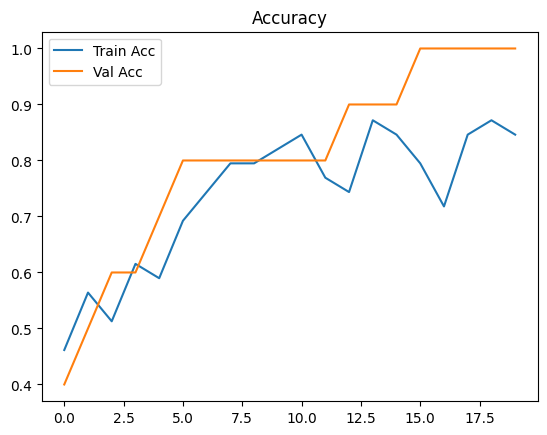

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")
plt.show()

In [37]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

[[9 0]
 [0 1]]
